<a href="https://colab.research.google.com/github/yardsale8/example/blob/master/MenTimeSpent_in_polars_KEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the data to Colab

Run each of the followings cells to download and unzip the data

In [1]:
!wget https://github.com/WSU-DataScience/USCOTS25_code_in_intro_data_science_workshop/raw/refs/heads/main/example_2_time_use/data/sample_data.zip

--2025-07-17 00:57:53--  https://github.com/WSU-DataScience/USCOTS25_code_in_intro_data_science_workshop/raw/refs/heads/main/example_2_time_use/data/sample_data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WSU-DataScience/USCOTS25_code_in_intro_data_science_workshop/refs/heads/main/example_2_time_use/data/sample_data.zip [following]
--2025-07-17 00:57:54--  https://raw.githubusercontent.com/WSU-DataScience/USCOTS25_code_in_intro_data_science_workshop/refs/heads/main/example_2_time_use/data/sample_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124158 (2.0M) [application/zip]
Sav

In [2]:
!unzip ./sample_data.zip

Archive:  ./sample_data.zip
   creating: AllYears_ReducedCols/
  inflating: __MACOSX/._AllYears_ReducedCols  
  inflating: AllYears_ReducedCols/atussum_2011_reduced.csv  
  inflating: __MACOSX/AllYears_ReducedCols/._atussum_2011_reduced.csv  
  inflating: AllYears_ReducedCols/atussum_2023_reduced.csv  
  inflating: __MACOSX/AllYears_ReducedCols/._atussum_2023_reduced.csv  
  inflating: AllYears_ReducedCols/atussum_2018_reduced.csv  
  inflating: __MACOSX/AllYears_ReducedCols/._atussum_2018_reduced.csv  
  inflating: AllYears_ReducedCols/atussum_2004_reduced.csv  
  inflating: __MACOSX/AllYears_ReducedCols/._atussum_2004_reduced.csv  
  inflating: AllYears_ReducedCols/atussum_2014_reduced.csv  
  inflating: __MACOSX/AllYears_ReducedCols/._atussum_2014_reduced.csv  
  inflating: AllYears_ReducedCols/atussum_2008_reduced.csv  
  inflating: __MACOSX/AllYears_ReducedCols/._atussum_2008_reduced.csv  
  inflating: AllYears_ReducedCols/atussum_2017_reduced.csv  
  inflating: __MACOSX/AllYears_

## Read CSV, mutate separate files, then UNION

In [81]:
import polars as pl
from glob import glob

In [82]:
(all_paths :=
 glob('./AllYears_ReducedCols/*.csv')
)

['./AllYears_ReducedCols/atussum_2004_reduced.csv',
 './AllYears_ReducedCols/atussum_2022_reduced.csv',
 './AllYears_ReducedCols/atussum_2014_reduced.csv',
 './AllYears_ReducedCols/atussum_2017_reduced.csv',
 './AllYears_ReducedCols/atussum_2010_reduced.csv',
 './AllYears_ReducedCols/atussum_2008_reduced.csv',
 './AllYears_ReducedCols/atussum_2009_reduced.csv',
 './AllYears_ReducedCols/atussum_2018_reduced.csv',
 './AllYears_ReducedCols/atussum_2023_reduced.csv',
 './AllYears_ReducedCols/atussum_2006_reduced.csv',
 './AllYears_ReducedCols/atussum_2003_reduced.csv',
 './AllYears_ReducedCols/atussum_2011_reduced.csv',
 './AllYears_ReducedCols/atussum_2016_reduced.csv',
 './AllYears_ReducedCols/atussum_2015_reduced.csv',
 './AllYears_ReducedCols/atussum_2005_reduced.csv',
 './AllYears_ReducedCols/atussum_2007_reduced.csv',
 './AllYears_ReducedCols/atussum_2024_reduced.csv',
 './AllYears_ReducedCols/atussum_2019_reduced.csv',
 './AllYears_ReducedCols/atussum_2021_reduced.csv',
 './AllYears

In [83]:
(code_names :=
 pl.read_csv('https://github.com/WSU-DataScience/USCOTS25_code_in_intro_data_science_workshop/raw/refs/heads/main/example_2_time_use/data/TU_CategoryNames_MenTimeSpent.csv')
)

TU_Codes,TU_CodeNames
str,str
"""t020101""","""Interior_Cleaning"""
"""t020102""","""Laundry"""
"""t020201""","""FoodPreparation_Cleanup"""
"""t020202""","""FoodPreparation_Cleanup"""
"""t020203""","""FoodPreparation_Cleanup"""


In [84]:
(all_years :=
 pl.concat([pl.read_csv(path).with_columns(path = pl.lit(path))
            for path in all_paths
          ])
)

TUCASEID,TEAGE,TESEX,TRCHILDNUM,t020101,t020102,t020201,t020202,t020203,t020301,t020302,t020303,t020501,t020502,t020901,t020902,t020903,t020904,t020905,path
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
20040101040003,71,1,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"
20040101040060,30,2,0,30,0,240,0,0,0,0,0,0,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"
20040101040079,29,1,1,30,0,45,0,0,0,0,0,0,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"
20040101040080,16,1,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"
20040101040110,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
20121212122493,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"
20121212122499,42,1,1,60,30,70,0,0,30,0,0,120,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"
20121212122505,74,1,0,0,0,30,0,15,0,0,0,0,0,0,0,0,0,0,"""./AllYears_ReducedCols/atussum…"


## Complete the tasks

1. Recode the sex,
2. Extract the year from the file path then drop the path,
3. Drop all the unneeded code columns,
4. Stack the code columns,
5. Join the code names then drop the codes,
6. Get the total mins per `person + code + year`,
7. Filter to men,
8. Get the average minutes per category/year.

**Note.** Throughout, we are using [`polars` column selectors](https://docs.pola.rs/api/python/stable/reference/selectors.html) instead of typing out a list of columns names.

In [75]:
import polars.selectors as cs

(men_time_spent :=
 all_years_combined
 .with_columns(TESEX = pl.col('TESEX')
                         .cast(pl.String())
                         .replace({1:'Male',
                                   2: 'Female'}))
 .with_columns(year = pl.col('path').str.split('_').list.get(2).cast(pl.Int32()))
 .drop(cs.starts_with('t0203') | cs.starts_with('t0205') | cs.starts_with('t0209') | pl.col("path"))
 .unpivot(cs.starts_with('t02'),
          index = ~cs.starts_with('t02'),
          variable_name = "TU_Codes",
          value_name = "Min")
 .join(code_names, on="TU_Codes")
 .drop(['TEAGE', 'TRCHILDNUM', 'TU_Codes'])
 .group_by(~cs.starts_with('Min'))
 .agg(Mins = pl.sum('Min'))
 .filter(pl.col('TESEX') == 'Male')
 .group_by(['year', 'TU_CodeNames'])
 .agg(Mins = pl.mean('Mins'))
)

year,TU_CodeNames,Mins
i32,str,f64
2012,"""Interior_Cleaning""",13.715318
2003,"""Laundry""",3.987517
2016,"""FoodPreparation_Cleanup""",24.05803
2009,"""Laundry""",4.772067
2004,"""Interior_Cleaning""",11.308019
…,…,…
2008,"""Laundry""",4.979097
2021,"""FoodPreparation_Cleanup""",28.123155
2011,"""Interior_Cleaning""",14.251282


## Let's use `plotnine` to recreate the original graph.

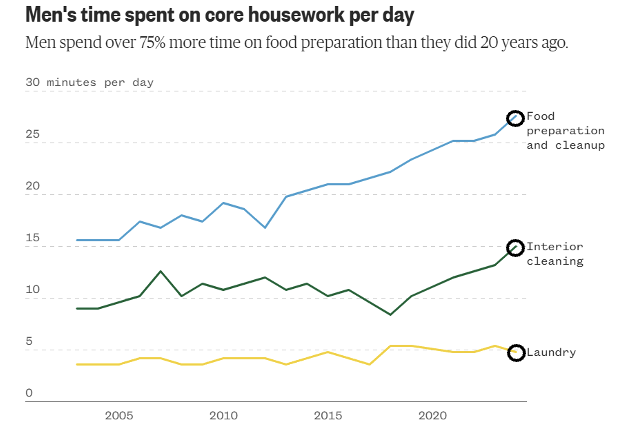

**Note.** `plotnine` is a Python implementation of ggplot2

In [77]:
from plotnine import ggplot, aes, geom_line, scale_x_continuous

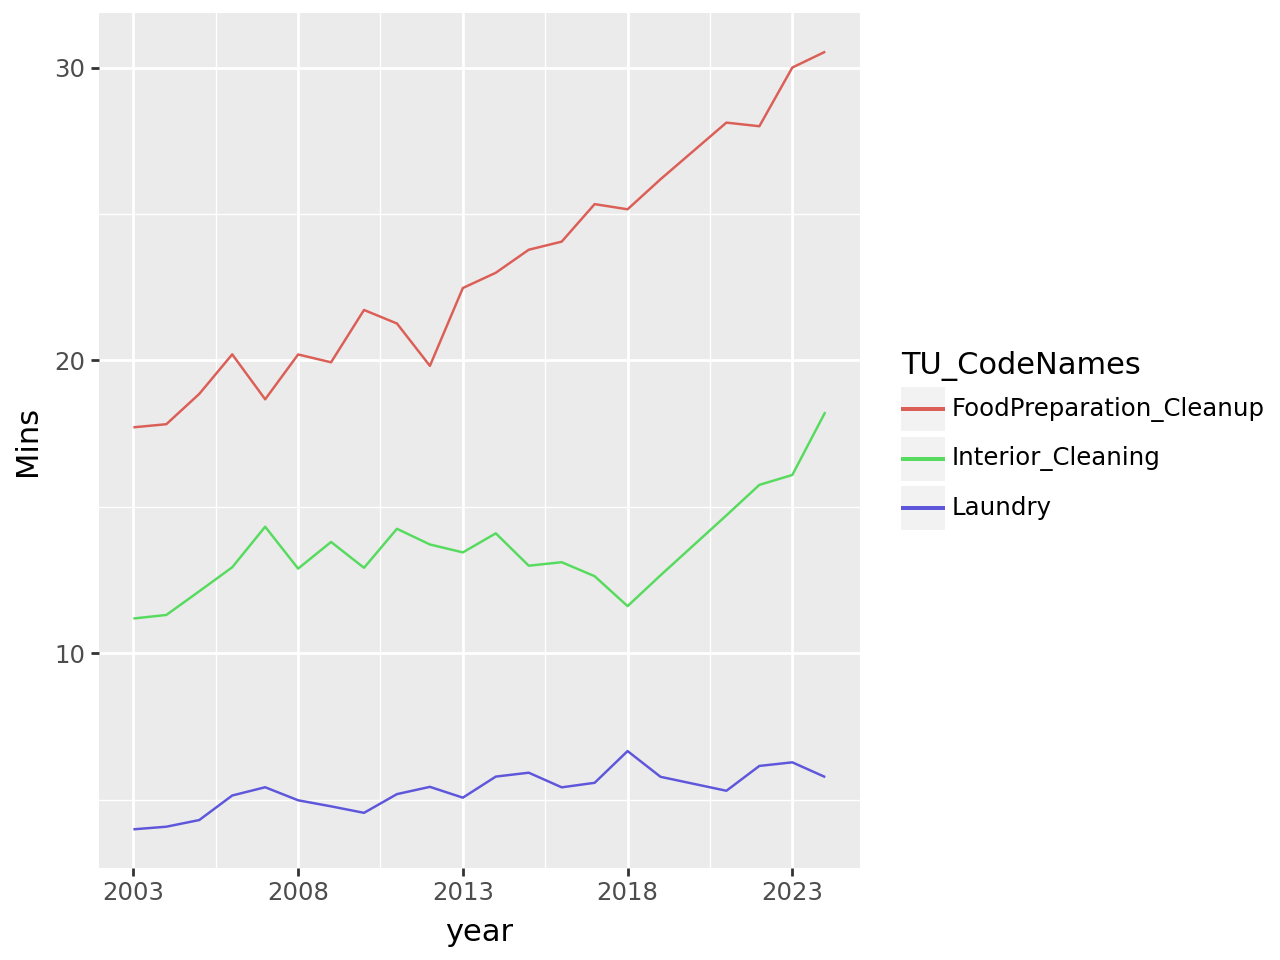

In [86]:
(ggplot(men_time_spent)
 + geom_line(aes(x = 'year', y = 'Mins', color = 'TU_CodeNames', group = 'TU_CodeNames'))
 + scale_x_continuous(breaks = range(2003, 2025, 5))
)